In [2]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt

In [3]:
# Importing the data / Leitura dos dados

url_hypotheses_us_log = 'https://raw.githubusercontent.com/RafaelGenari/Bootcamp_Project_Making_Decisions_Based_In_Data/refs/heads/main/hypotheses_us.csv'

hypotheses_log = pd.read_csv(url_hypotheses_us_log, sep = ';')

url_orders_us_log ='https://raw.githubusercontent.com/RafaelGenari/Bootcamp_Project_Making_Decisions_Based_In_Data/refs/heads/main/orders_us.csv'

orders_log = pd.read_csv(url_orders_us_log, sep = ',')

url_visits_us_log = 'https://raw.githubusercontent.com/RafaelGenari/Bootcamp_Project_Making_Decisions_Based_In_Data/refs/heads/main/visits_us.csv'

visits_log = pd.read_csv(url_visits_us_log, sep = ',')

## Data Cleaning / Limpeza dos Dados

### Hyphotheses Log

In [4]:
hypotheses_log.info()
print()
hypotheses_log

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes



,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [5]:
hypotheses_log.describe()

,Reach,Impact,Confidence,Effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


In [6]:
hypotheses_log.columns = hypotheses_log.columns.str.lower()

In [7]:
hypotheses_log.info()
print()
hypotheses_log

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes



,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [8]:
hypotheses_log.duplicated().sum()

0

### Orders Log

In [9]:
orders_log.info()
print()
orders_log.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB



,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [10]:
orders_log.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


In [11]:
orders_log['date'] = pd.to_datetime(orders_log['date'])

In [12]:
orders_log = orders_log.rename(columns = {'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})

In [13]:
orders_log.info()
print()
orders_log.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB



,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [14]:
orders_log.duplicated().sum()

0

### Visits Log

In [15]:
visits_log.info()
print()
visits_log.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB



,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [16]:
visits_log.describe()

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [17]:
visits_log['date'] = pd.to_datetime(visits_log['date'])

In [18]:
visits_log.info()
print()
visits_log.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB



,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [19]:
visits_log.duplicated().sum()

0

### Conclusion Data Cleaning /Conclusão Limpeza dos Dados

- Hypotheses Log

    - Temos um dataframe com 9 entradas, que neste caso são hipóteses a serem testadas, bem como os dados de alcance, impacto, confiança e os recursos necessários para o teste da mesma. Não existe valores duplicados, a nível de valores temos uma mescla de valores uma vez que todas as colunas são de 0 a 10, além disso foram feitos ajustes nas colunas para deixar todas com letras minúsculas, contudo, de resto os dados estão ok.

- Orders Log

    - Um total de 1197 entradas, sem valores nulos/ausentes ou duplicados, onde temos todos os dados relacionados as vendas, como: identificador do pedido, identificador do usuário que fez o pedido, a data do pedido, o valor/receita do pedido e o grupo do teste A/B que o usuário fez parte. Para este dataframe os ajustes feitos foram transformar a coluna de data para o formato correto, bem como correção no título das colunas 'transaction_id' e 'visitor_id', sendo adicionado o " _ " para melhor leitura. Um ponto importante que podemos notar desde o início são os valores das receitas onde temos uma média de valor gasto de 131.49, tendo como o valor mínimo de compra 5.0 e o valor máximo 19920.40.

- Visits Log

    - Identificamos 62 entradas, sem valores nulos/ausentes ou duplicados, que são correspondente a data de visita no site, o grupo do teste A/B que faz parte e o número de visitas naquela data específica para o grupo do teste A/B especificado. Foi feito o ajuste da coluna date para o formato correto. Para uma visualização inicial dos dados, podemos identificar que começam no dia 01/08/2019 até 31/08/2019 (valores máximos e mínimos referentes as datas), já com as visitas houve uma média de 607.29 visitas, com um máximo de 770.0 e um mínimo de 361.0.

## Data Analysis / Análise dos Dados

### Checking Hypotheses / Checagem as Hipóteses

In [20]:
hypotheses_log['ICE'] =(
                        hypotheses_log['impact']
                        * hypotheses_log['confidence']
) / hypotheses_log['effort']

hypotheses_log.head()

,hypothesis,reach,impact,confidence,effort,ICE
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000


In [21]:
hypotheses_log['RICE'] =(
                        hypotheses_log['reach']
                        * hypotheses_log['impact']
                        * hypotheses_log['confidence']
) / hypotheses_log['effort']

hypotheses_log

,hypothesis,reach,impact,confidence,effort,ICE,RICE
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2


### Checking Hypotheses Conclusion / Conclusão da Checagem das Hipóteses

Podemos reparar que hipóteses com alto alcance, coluna 'reach' com número próximo a 10 (valor máximo), tendem a ter uma prioridade maior em RICE do que em ICE, como por exemplo a hipótese 7 que tem um valor de 10 em 'reach' e consequentemente o valor de RICE (112.0) é muito 10x maior que o valor de ICE (11.20).

Quando o valor da coluna de alcance ('reach') tem um valor baixo, os valores da coluna RICE e ICE a ser semelhante ou até mesmo igual, como por exemplo a hipótese 8 que tem o valor de 1 em 'reach' e os valores de RICE E ICE é igual (16.2) ou até mesmo a hipótese 1 que tem um 'reach' de 2 e uma diferença mínima entre RICE (4.0) e ICE (2.0)

Essas variações podem acontecer porque ao incluir o fator 'reach' no cálculo do método, irá beneficia alterações que afetam um número maior de usuários, independentemente do esforço ou do impacto individual. Em contrapartida, o ICE prioriza apenas a combinação de impacto, confiança e esforço, ignorando o número de pessoas impactadas.

### A/B Test / Teste A/B

In [22]:
revenue_cumulative = orders_log.groupby(['date', 'group']).agg({'revenue': 'sum', 'transaction_id': 'nunique'}).reset_index()
revenue_cumulative['revenue'] = revenue_cumulative['revenue'].astype(int)
revenue_cumulative.head(5)

,date,group,revenue,transaction_id
0,2019-08-01,A,2356,24
1,2019-08-01,B,1620,21
2,2019-08-02,A,1503,20
3,2019-08-02,B,2623,24
4,2019-08-03,A,1815,24


In [23]:
revenue_cumulative['cumulative_revenue'] = revenue_cumulative.groupby('group')['revenue'].cumsum()
revenue_cumulative['cumulative_orders'] = revenue_cumulative.groupby('group')['transaction_id'].cumsum()
revenue_cumulative.head(5)

,date,group,revenue,transaction_id,cumulative_revenue,cumulative_orders
0,2019-08-01,A,2356,24,2356,24
1,2019-08-01,B,1620,21,1620,21
2,2019-08-02,A,1503,20,3859,44
3,2019-08-02,B,2623,24,4243,45
4,2019-08-03,A,1815,24,5674,68


In [24]:
revenue_cumulative['orders_mean'] = revenue_cumulative['cumulative_revenue'] / revenue_cumulative['cumulative_orders']
revenue_cumulative.head(5)

,date,group,revenue,transaction_id,cumulative_revenue,cumulative_orders,orders_mean
0,2019-08-01,A,2356,24,2356,24,98.166667
1,2019-08-01,B,1620,21,1620,21,77.142857
2,2019-08-02,A,1503,20,3859,44,87.704545
3,2019-08-02,B,2623,24,4243,45,94.288889
4,2019-08-03,A,1815,24,5674,68,83.441176


In [25]:
visits_grouped = visits_log.groupby(['date', 'group']).agg({'visits': 'sum'}).reset_index()
visits_grouped.columns = ['date', 'group', 'visits_sum']
visits_grouped

,date,group,visits_sum
0,2019-08-01,A,719
1,2019-08-01,B,713
2,2019-08-02,A,619
3,2019-08-02,B,581
4,2019-08-03,A,507
...,...,...,...
57,2019-08-29,B,531
58,2019-08-30,A,490
59,2019-08-30,B,490
60,2019-08-31,A,699


In [26]:
visits_grouped['cumulative_orders_sum'] = visits_grouped.groupby('group')['visits_sum'].cumsum()
visits_grouped

,date,group,visits_sum,cumulative_orders_sum
0,2019-08-01,A,719,719
1,2019-08-01,B,713,713
2,2019-08-02,A,619,1338
3,2019-08-02,B,581,1294
4,2019-08-03,A,507,1845
...,...,...,...,...
57,2019-08-29,B,531,17708
58,2019-08-30,A,490,18037
59,2019-08-30,B,490,18198
60,2019-08-31,A,699,18736


In [27]:
data_total = pd.merge(revenue_cumulative, visits_grouped, how = 'left', on = ['date', 'group'])
data_total

,date,group,revenue,transaction_id,cumulative_revenue,cumulative_orders,orders_mean,visits_sum,cumulative_orders_sum
0,2019-08-01,A,2356,24,2356,24,98.166667,719,719
1,2019-08-01,B,1620,21,1620,21,77.142857,713,713
2,2019-08-02,A,1503,20,3859,44,87.704545,619,1338
3,2019-08-02,B,2623,24,4243,45,94.288889,581,1294
4,2019-08-03,A,1815,24,5674,68,83.441176,507,1845
...,...,...,...,...,...,...,...,...,...
57,2019-08-29,B,3623,20,87328,596,146.523490,531,17708
58,2019-08-30,A,1364,11,63549,545,116.603670,490,18037
59,2019-08-30,B,3393,24,90721,620,146.324194,490,18198
60,2019-08-31,A,991,12,64540,557,115.870736,699,18736


#### Receita acumulada por grupo

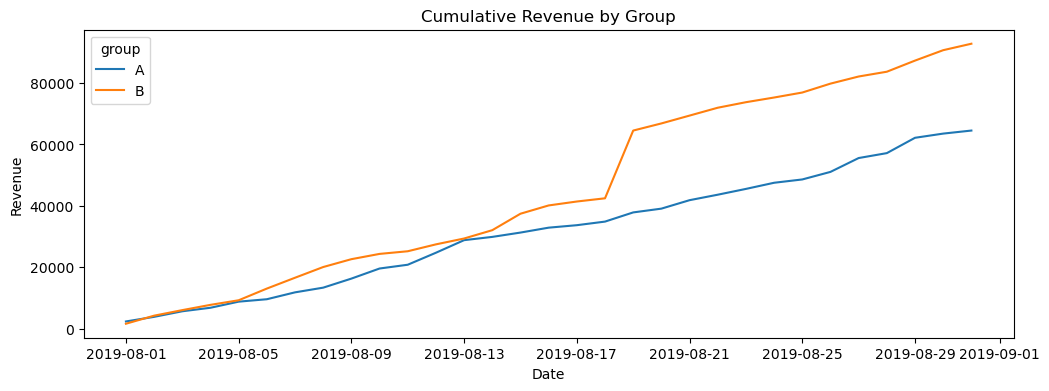

In [28]:
plt.figure(figsize=(12, 4))
sns.lineplot(x = 'date', y= 'cumulative_revenue', hue = 'group', data = data_total)
plt.title('Cumulative Revenue by Group')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

- Podemos notar que em uma fase inicial a receita acumulada de ambos os grupos era parecida, contudo, em 05/08/2019 o grupo B começou a ter valores maiores e em 13/08/2019 voltaram a ficar "iguais" por um breve momento, mas logo em seguida o cenário voltou como anteriormente tendo o grupo B sempre com uma receita acumulada maior, sendo assim, o grupo B gerou e manteve uma receita acumulada sempre superior ao grupo A.

- Este resultado pode depender de fatores como picos de venda em determinado período ou até mesmo estratégias de marketing mais eficazes para o grupo B, por exemplo.

#### Tamanho médio acumulado do pedido por grupo

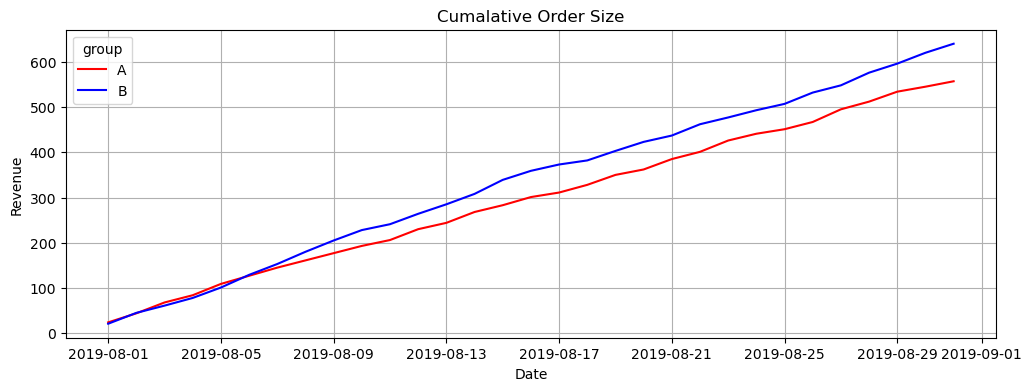

In [29]:
plt.figure(figsize=(12, 4))
sns.lineplot(x = 'date', y= 'cumulative_orders', hue = 'group', palette=['red', 'blue'], data = data_total)
plt.title('Cumalative Order Size')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.grid()
plt.show()

- Novamente temos um resultado mais favorável ao grupo B, em que a linha correspondente ao mesmo tem uma tendência a ficar acima da linha do grupo A. Com isso, podemos concluir de que o tamanho médio do pedido realizado tende a ser maior no grupo B ou que as médias deste grupo são mais expressivas por uma maior tempo se comparado com o outro grupo.

#### Diferença relativa no tamanho médio acumulado do pedido para o grupo B em comparação com o grupo A

In [30]:
a_group = data_total[data_total['group'] == 'A'][['date', 'orders_mean']].rename(columns={'orders_mean': 'mean_a'})
b_group = data_total[data_total['group'] == 'B'][['date', 'orders_mean']].rename(columns={'orders_mean': 'mean_b'})

relative_comparison = pd.merge(a_group, b_group, on = 'date')

relative_comparison['relative_difference'] = (relative_comparison['mean_b'] - relative_comparison['mean_a']) / relative_comparison['mean_a']
relative_comparison.head()

,date,mean_a,mean_b,relative_difference
0,2019-08-01,98.166667,77.142857,-0.214164
1,2019-08-02,87.704545,94.288889,0.075074
2,2019-08-03,83.441176,99.163934,0.188429
3,2019-08-04,81.190476,99.564103,0.226303
4,2019-08-05,80.807339,91.693069,0.134712


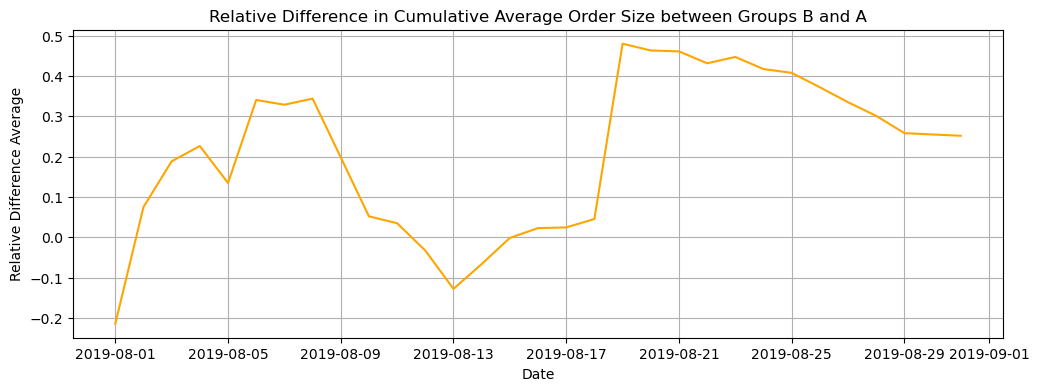

In [31]:
plt.figure(figsize=(12, 4))
plt.plot(relative_comparison['date'], relative_comparison['relative_difference'], color='orange')
plt.title('Relative Difference in Cumulative Average Order Size between Groups B and A')
plt.xlabel('Date')
plt.ylabel('Relative Difference Average')
plt.grid()
plt.show()

- Neste gráfico podemos ver a diferença relativa entre os grupos dentro de um período de tempo, onde pode-se observar que temos alguns picos, nos quais podem representar que o grupo B apresentou uma diferença entre o grupo A neste período específico.

#### Taxa de conversão de cada grupo como a proporção de pedidos para o número de visitas para cada dia

In [32]:
data_total['conversion_rate'] = data_total['transaction_id'] / data_total['visits_sum']
data_total

,date,group,revenue,transaction_id,cumulative_revenue,cumulative_orders,orders_mean,visits_sum,cumulative_orders_sum,conversion_rate
0,2019-08-01,A,2356,24,2356,24,98.166667,719,719,0.033380
1,2019-08-01,B,1620,21,1620,21,77.142857,713,713,0.029453
2,2019-08-02,A,1503,20,3859,44,87.704545,619,1338,0.032310
3,2019-08-02,B,2623,24,4243,45,94.288889,581,1294,0.041308
4,2019-08-03,A,1815,24,5674,68,83.441176,507,1845,0.047337
...,...,...,...,...,...,...,...,...,...,...
57,2019-08-29,B,3623,20,87328,596,146.523490,531,17708,0.037665
58,2019-08-30,A,1364,11,63549,545,116.603670,490,18037,0.022449
59,2019-08-30,B,3393,24,90721,620,146.324194,490,18198,0.048980
60,2019-08-31,A,991,12,64540,557,115.870736,699,18736,0.017167


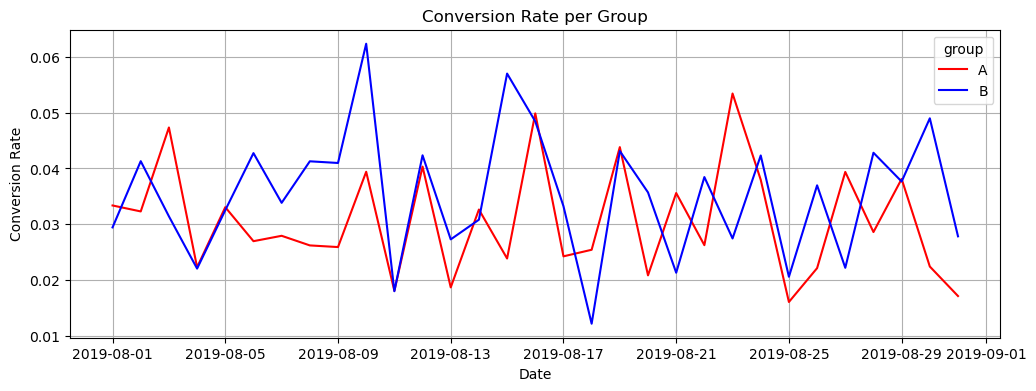

In [33]:
plt.figure(figsize=(12, 4))
sns.lineplot(x = 'date', y= 'conversion_rate', hue = 'group', palette=['red', 'blue'], data = data_total)
plt.title('Conversion Rate per Group')
plt.xlabel('Date')
plt.ylabel('Conversion Rate')
plt.grid()
plt.show()

- Quando analisada a taxa de conversão de cada grupo, podemos observar um comportamento similar entre elas, onde ambas tem um zigue-zague ao longo do período analisado. A diferença mais notável está logo no início do gráfico, em que as linhas tem uma separação, que neste caso, mostra que o grupo B teve uma melhor conversão naqueles dias, assim como no final do gráfico onde ambas as linhas estão em uma decrescente, contudo, com uma diferença que mostra uma maior taxa de conversão para o grupo B.

#### Diferença relativa na conversão cumulativa para o grupo B em comparação com o grupo A

In [34]:
group_a = data_total[data_total['group'] == 'A'][['date', 'conversion_rate']].rename(columns={'conversion_rate': 'conversion_a'})
group_b = data_total[data_total['group'] == 'B'][['date', 'conversion_rate']].rename(columns={'conversion_rate': 'conversion_b'})

In [35]:
comparison_ab = pd.merge(group_a, group_b, on = 'date')
comparison_ab.head(5)

,date,conversion_a,conversion_b
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032310,0.041308
2,2019-08-03,0.047337,0.031434
3,2019-08-04,0.022315,0.022078
4,2019-08-05,0.033069,0.032532


In [36]:
comparison_ab['relative_difference'] = (comparison_ab['conversion_b'] - comparison_ab['conversion_a']) / comparison_ab['conversion_a']
comparison_ab.head(5)

,date,conversion_a,conversion_b,relative_difference
0,2019-08-01,0.033380,0.029453,-0.117637
1,2019-08-02,0.032310,0.041308,0.278485
2,2019-08-03,0.047337,0.031434,-0.335953
3,2019-08-04,0.022315,0.022078,-0.010633
4,2019-08-05,0.033069,0.032532,-0.016238


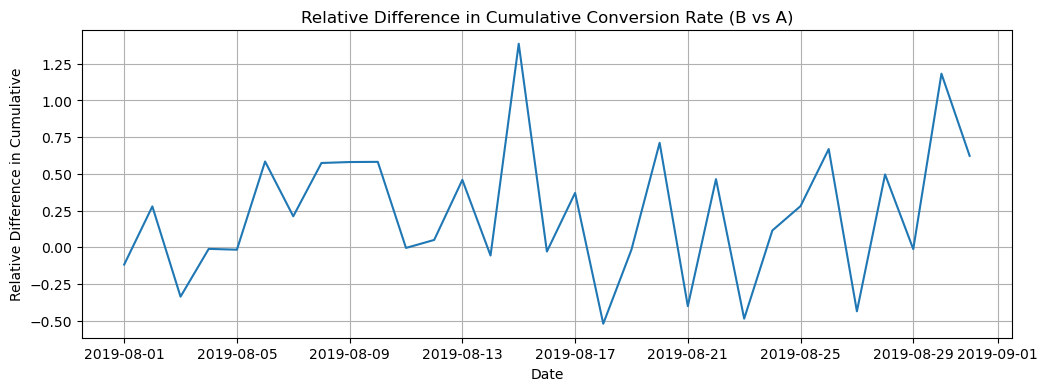

In [37]:
plt.figure(figsize=(12, 4))
sns.lineplot(x = 'date', y= 'relative_difference', data = comparison_ab)
plt.title('Relative Difference in Cumulative Conversion Rate (B vs A)')
plt.xlabel('Date')
plt.ylabel('Relative Difference in Cumulative')
plt.grid()
plt.show()

- Este é o resultado que mostra a variação entre as taxas de conversões acumuladas do grupo B em relação ao grupo A, onde podemos notar um padrão de zigue-zague tendo sempre uma crescente, apesar de algumas quedas mais profundas, contudo, com um grande pico bem ao meio do gráfico.

#### Dispersão dos preços dos pedidos

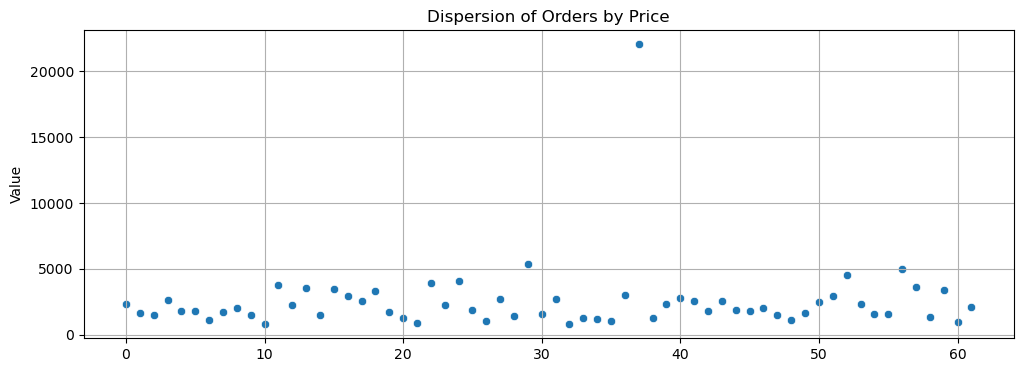

In [45]:
plt.figure(figsize=(12, 4))
sns.scatterplot(x = range(len(data_total)), y= 'revenue', data = data_total)
plt.title('Dispersion of Orders by Price')
plt.xlabel('')
plt.ylabel('Value')
plt.grid()
plt.show()

- Quando olhamos a dispersão dos preços dos pedidos, nota-se que praticamente todos os pedidos estão abaixo dos 5000, contudo, conseguimos ver 3 pedidos que estão acima desta linha (1 deste está um pouco acima dos 5000 apenas). Em resumo, os pedidos com valores extraordinários (considerando estes acima dos 5000) são muito raros de acontecer, com uma tendência dos pedidos serem abaixo deste valor.

#### Percentis 95 e 99: número de pedidos por usuário e preços dos pedidos

In [39]:
percentile_95_users = np.percentile(data_total['transaction_id'], 0.95)
percentile_99_users = np.percentile(data_total['transaction_id'], 0.99)

print(f'95 percentile: {percentile_95_users}')
print(f'99 percentile: {percentile_99_users}')

95 percentile: 9.5795
99 percentile: 9.6039


In [40]:
anomalies = data_total[data_total['transaction_id'] > percentile_99_users]

print('Dados se tornam anomalia a partir do 99 percentile: ',percentile_99_users)

Dados se tornam anomalia a partir do 99 percentile:  9.6039


In [41]:
percentile_95_revenue = np.percentile(data_total['revenue'], 0.95)
percentile_99_revenue = np.percentile(data_total['revenue'], 0.99)

print(f'95 percentile: {percentile_95_revenue}')
print(f'99 percentile: {percentile_99_revenue}')

95 percentile: 798.272
99 percentile: 798.6624


In [42]:
anomalies = data_total[data_total['transaction_id'] > percentile_99_revenue]

print('Dados se tornam anomalia a partir do 99 percentile: ',percentile_99_revenue)

Dados se tornam anomalia a partir do 99 percentile:  798.6624


- Esta métrica de percentil 95 e percentil 99 representam limites superiores de certa proporção de dados.

    - Percentil 95 usuários: 95% dos dados estão abaixo dos 9.5795 e apenas 5% dos valores são maiores que este valor.

    - Percentil 99 usuários: 99% dos dados estão abaixo dos 9.6039 e apenas 1% dos valores são maiores que este valor.

    - Percentil 95 pedidos: 95% dos dados estão abaixo dos 798.272 e apenas 5% dos valores são maiores que este valor.

    - Percentil 99 pedidos: 99% dos dados estão abaixo dos 798.6624 e apenas 1% dos valores são maiores que este valor.

### Teste de Significância Estatística

In [43]:
t_stat_conversion, p_value_conversion = stats.ttest_ind(comparison_ab['conversion_a'], comparison_ab['conversion_b'])

print(f"P-Value for Conversion Rate: {p_value_conversion}")

P-Value for Conversion Rate: 0.0922947738393625


In [44]:
order_size_a = data_total[data_total['group'] == 'A']['revenue']
order_size_b = data_total[data_total['group'] == 'B']['revenue']
t_stat_size, p_value_size = stats.ttest_ind(order_size_a, order_size_b)

print(f"P-Value for Average Order Size: {p_value_size}")

P-Value for Average Order Size: 0.1899072850991016


- O teste de significância estatística verificamos se iremos descartar a hipótese nula, a qual consiste identificar que não há um diferença entre os grupos.

    A taxa de conversão tem um p-valor de 0.0923, onde juntamente com toda a análise realizada anteriormente concretizamos que temos uma diferença estatisticamente significativa entre os grupos A e B na taxa de conversão.

    O tamanho médio de pedido conta com um p-valor de 0.190, onde juntamente com toda a análise realizada anteriormente concretizamos que temos uma diferença estatisticamente significativa entre os grupos A e B no tamanho médio dos pedidos.

## Conclusão

- Com base na análise e nos testes estatísticos realizados, podemos concluir que não é preciso dar continuidade ao teste, pois temos um grupo que se destacou do outro.

    Durante toda a análise, por mais que em alguns momentos o grupo A e B tinham valores semelhantes, o grupo B na sua grande maioria teve valores maiores se comparado ao outro grupo.

    Tanto a receita acumulada quanto o tamanho médio dos pedidos foram maiores para o grupo B, onde pudemos observar uma diferença significativa quando separado os valores por grupo.

    Além disso, nos testes estatísticos apenas confirmamos essa diferença de um grupo para o outro, o que já era perceptível durante toda a análise, contudo, era necessário tal confirmação.